In [1]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing the dataset
data = pd.read_csv('car data.csv')

In [3]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Observation

There are 4 categorical variables and 5 numerical variables present in the dataset. in the numerical
features there are temporal feature and discrete feature.
1. year - Temporal feature
2. Owner - discrete feature
3. Selling_price, present_price and kms_driven are continuous features
4. car_name, fuel_type, seller_type and transmission are all categorical features

In [5]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
#check for null values present in the dataset
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Observation 

There are zero null values present in the dataset.

In [7]:
#seperating the categorical features from the dataset
categorical_features = [feature for feature in data.columns if data[feature].dtype=='O']
categorical_features

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [8]:
#temporal feature
year_feature = ['Year']
year_feature

['Year']

In [9]:
#discrete feature 
discrete_feature = [feature for feature in data.columns if data[feature].nunique()<25 and feature not in categorical_features+year_feature]
discrete_feature

['Owner']

In [10]:
#continuous feature 
continuous_features = [feature for feature in data.columns if feature not in categorical_features+discrete_feature+year_feature]
continuous_features

['Selling_Price', 'Present_Price', 'Kms_Driven']

# Univariate Analysis of features

Continuous Features

In [11]:
#importing the library for Q-Q plot
from scipy.stats import probplot

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


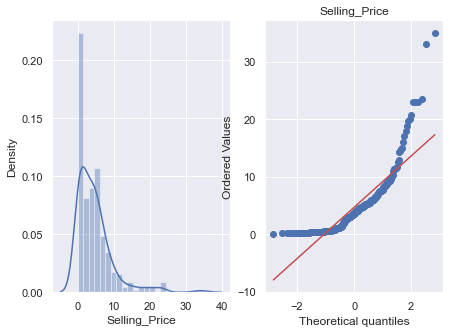

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


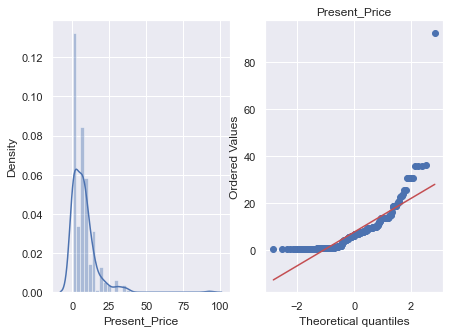

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


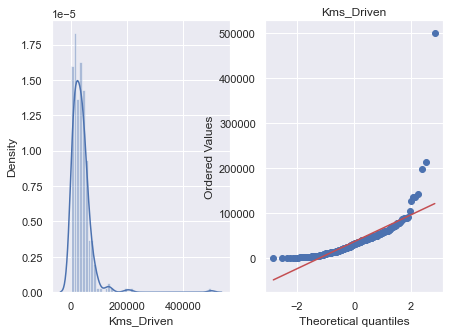

In [12]:
#see the distribution of the continuous features
for i in range(len(continuous_features)):
    sns.set_theme()
    plt.figure(figsize=(7,5))
    plt.subplot(1,2,1)
    sns.distplot(data[continuous_features[i]])
    plt.subplot(1,2,2)
    probplot(data[continuous_features[i]], plot=plt, dist='norm')
    plt.title(continuous_features[i])
    plt.show()

# Observation

Features are skewed towards right and there are extreme outliers present in the features. 
Log normal can be used for normalising the features.

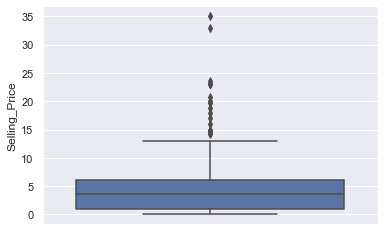

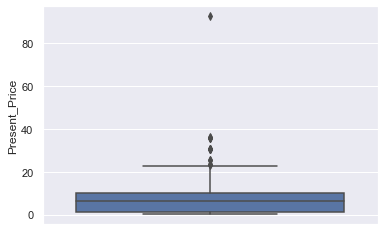

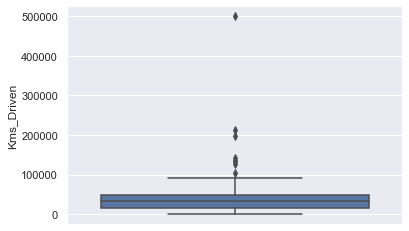

In [13]:
#checking the outliers by plotting box plot of each continuous features 
for feature in continuous_features:
    sns.boxplot(y=data[feature])
    plt.show()

# Observation

There are extreme outliers present in the 3 continuous features. we can remove those outliers
quantile methods.

categorical features univariate analysis

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


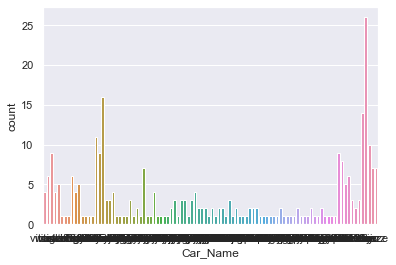

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


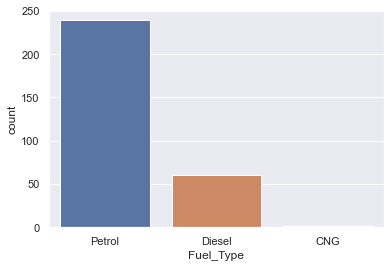

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


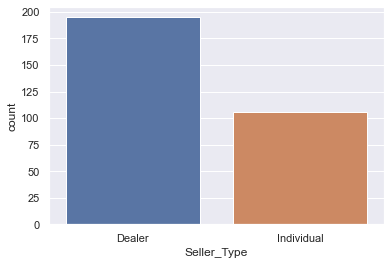

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


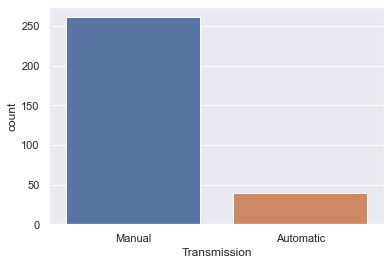

In [14]:
#drawing countplot to see the balance and imbalance of features 
for feature in categorical_features:
    sns.countplot(feature, data=data)
    plt.show()

# Observation

features Transmission, Fuel_type and seller_type have imbalance in the data.

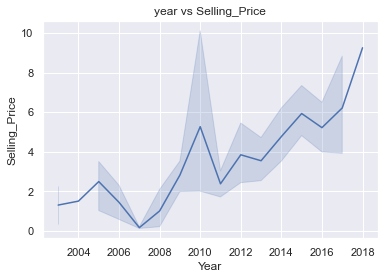

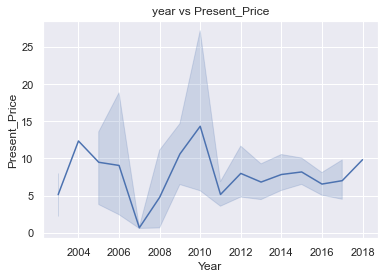

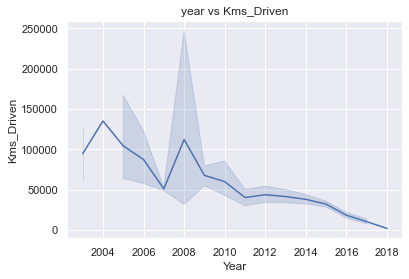

In [15]:
#comparing Temporal feature with continuous features
for feature in continuous_features:
    sns.lineplot(x=data['Year'], y=data[feature])
    plt.title('year vs {}'.format(feature))
    plt.show()

# Observation

1. selling price of the car increases with year showing upward trend
2. present price of the car showing zig zag trend
3. over the period of years the car gives low milage

In [16]:
#creating numerical feature for multivariate analysis
numerical_featrues = discrete_feature+continuous_features
numerical_featrues

['Owner', 'Selling_Price', 'Present_Price', 'Kms_Driven']

In [17]:
#to see the corelation between the numerical features 
round(data[numerical_featrues].corr(), 2)

,Owner,Selling_Price,Present_Price,Kms_Driven
Owner,1.00,-0.09,0.01,0.09
Selling_Price,-0.09,1.00,0.88,0.03
Present_Price,0.01,0.88,1.00,0.20
Kms_Driven,0.09,0.03,0.20,1.00


<AxesSubplot:>

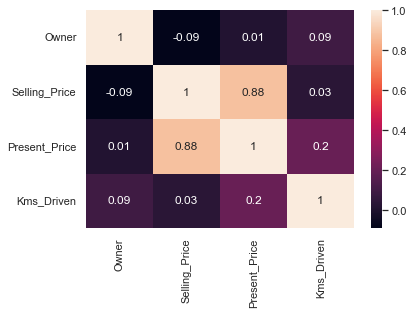

In [18]:
#heatmap to visualize the corelation
sns.heatmap(round(data[numerical_featrues].corr(), 2), annot=True)

# Observation

1. only selling price and present price showing high corelation
2. others are showing no corelation between the features

In [19]:
from scipy.stats import chi2_contingency

In [20]:
#chi square test can be used to find the corelation between the categorical features

chi_square = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(data['Selling_Price'], data[feature]))[1]<0.05:
        chi_square.append('reject the null hypothesis')
    else:
        chi_square.append('fail to reject the null hypothesis')
            
result = pd.DataFrame(data= [categorical_features, chi_square]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Car_Name,fail to reject the null hypothesis
1,Fuel_Type,fail to reject the null hypothesis
2,Seller_Type,reject the null hypothesis
3,Transmission,reject the null hypothesis


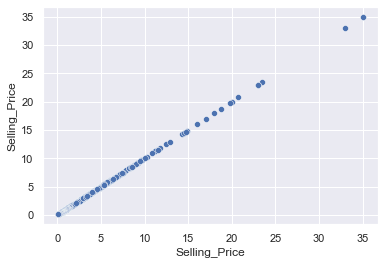

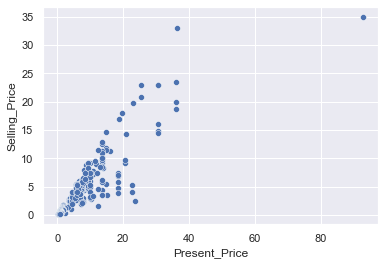

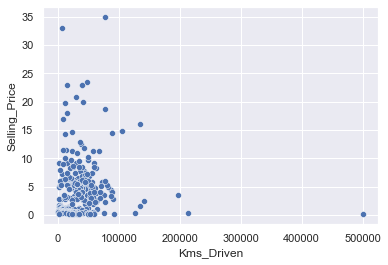

In [21]:
#comparing continuous features with selling price

for feature in continuous_features:
    sns.scatterplot(x=feature, y='Selling_Price', data=data)
    plt.show()

# Observation

1. Selling price of the car decreases with number of kms driven.
2. present price and selling price have positive corelation

In [22]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [23]:
#city is the maximum sold car of all years
data.Car_Name.value_counts(ascending=False)

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

<AxesSubplot:xlabel='Car_Name', ylabel='count'>

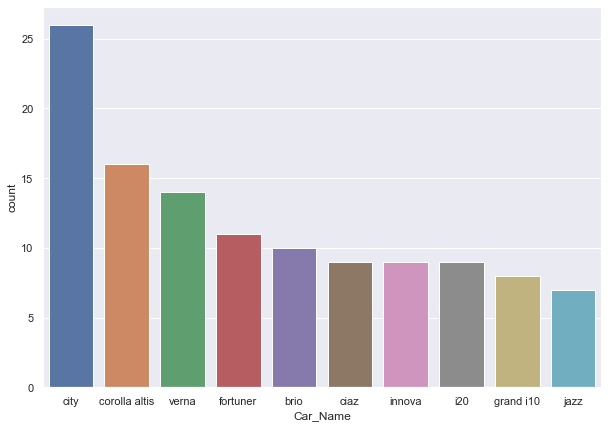

In [24]:
plt.figure(figsize=(10,7))
sns.countplot(x='Car_Name', data=data, order=data.Car_Name.value_counts()[0:10].index)

In [25]:
#maximum number of car sold in the year 2015 followed by 2016
data.Year.value_counts()[0:5]

2015    61
2016    50
2014    38
2017    35
2013    33
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='count'>

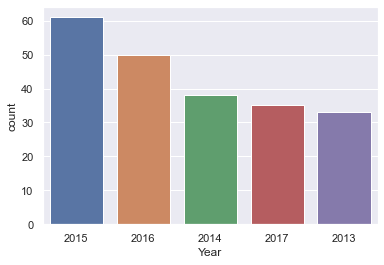

In [26]:
sns.countplot(x='Year', data=data, order=data.Year.value_counts()[0:5].index)

In [27]:
#petrol cars have high selling price compared to diesel and CNG
data.groupby('Fuel_Type')['Selling_Price'].agg('sum')

Fuel_Type
CNG         6.20
Diesel    616.71
Petrol    780.14
Name: Selling_Price, dtype: float64

In [28]:
#which car has high selling price
data.sort_values(by='Selling_Price', ascending=False)[['Car_Name', 'Selling_Price']][0:5]

,Car_Name,Selling_Price
86,land cruiser,35.0
64,fortuner,33.0
63,fortuner,23.5
82,innova,23.0
51,fortuner,23.0


observation : Land Cruiser car has sold with highest price of 35 followed by fortuner.

In [29]:
#which car has highest present price
data.sort_values('Present_Price', ascending=False)[0:5]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,land cruiser,2010,35.00,92.60,78000,Diesel,Dealer,Manual,0
64,fortuner,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0
59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0
62,fortuner,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0
63,fortuner,2015,23.50,35.96,47000,Diesel,Dealer,Automatic,0


observation: land cruiser has both highest present and selling price, its a diesel type and
    manual transmission car.

In [30]:
#the car which has driven high kms by the owner
data.sort_values(by= 'Kms_Driven', ascending=False)[['Car_Name', 'Kms_Driven']][0:5]

,Car_Name,Kms_Driven
196,Activa 3g,500000
179,Honda Karizma,213000
84,innova,197176
85,camry,142000
77,corolla,135154


observation: Activa 3g car has driven 500000 kms which is the highest kms driven car followed
    by hondat karizma.

Text(0.5, 1.0, 'Fuel type vs selling price')

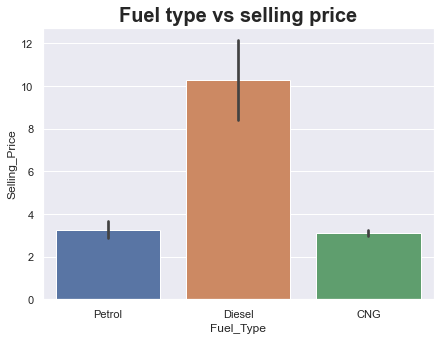

In [31]:
#comparing fuel type with selling price
plt.figure(figsize=(7,5))
sns.barplot(x=data.Fuel_Type, y=data.Selling_Price)
plt.title('Fuel type vs selling price', fontsize=20, fontweight='bold')

observation: Diesel has highest average selling price.

Text(0.5, 1.0, 'Transmission vs selling price')

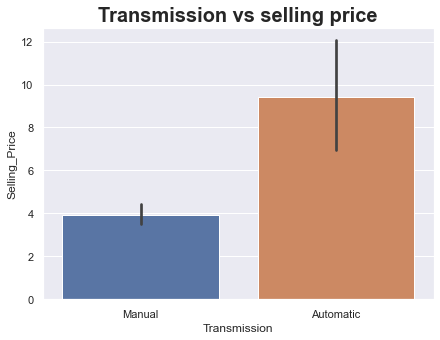

In [32]:
#comparing transmission type with selling price
plt.figure(figsize=(7,5))
sns.barplot(x=data.Transmission, y=data.Selling_Price)
plt.title('Transmission vs selling price', fontsize=20, fontweight='bold')

observation: The average selling price of an automatic transmission car is very high compared to
    manual transmission car.

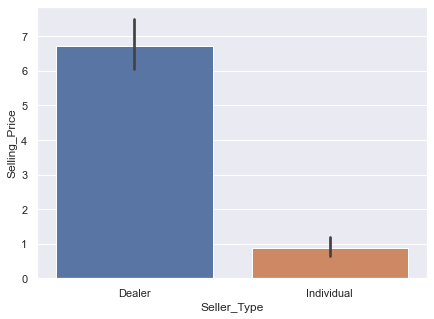

In [33]:
#comparing seller type vs selling price
plt.figure(figsize=(7,5))
sns.barplot(x=data.Seller_Type, y=data.Selling_Price)
plt.show()

observation: dealers have most selling price

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

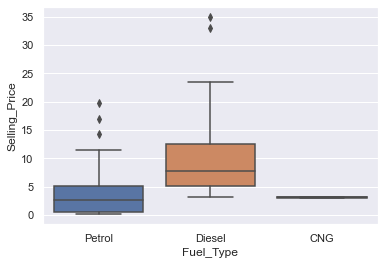

In [34]:
#box plot to see the outliers present in the data by fuel type
sns.boxplot(y=data.Selling_Price, x=data.Fuel_Type)